# 딥러닝 분류

In [14]:
"""from keras.utils import to_categorical

# 타겟 데이터 원-핫 인코딩

이걸 해도 데이터가 1인 것도 있어서 y_test에 못 들어가는 데이터가 있어서 돌아가질 않음

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델 정의
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # 클래스 수에 맞는 출력

# 옵티마이저 설정 및 컴파일
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

# 모델 학습
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32)

# 모델 예측
y_pred = model.predict(X_test)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'평가 손실: {loss}, 정확도: {accuracy}')
"""

"""이게 내가 y를 카테고리화 하여도 정보가 1인게 있어서 그냥 대 중 소 로 나누는게 답인 것 같다."""

'이게 내가 y를 카테고리화 하여도 정보가 1인게 있어서 그냥 대 중 소 로 나누는게 답인 것 같다.'

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# 데이터 로드
data = pd.read_csv('abalone.csv')

# 'sex' 열을 원-핫 인코딩으로 변환
data = pd.get_dummies(data, columns=['Sex'], drop_first=True) #더미 변수 함정(다중공선성)을 피하기 위해 첫 번째 열을 제거합니다.

# Rings 값을 범주형으로 변환 (예: 0-8: 'low', 9-12: 'medium', 13-29: 'high')
bins = [0, 8, 12, 29]
labels = ['low', 'medium', 'high']
data['Rings_category'] = pd.cut(data['Rings'], bins=bins, labels=labels)

# 특성과 레이블 설정
X = data.drop(['Rings', 'Rings_category'], axis=1)
y = data['Rings_category']

# 레이블 인코딩
y = pd.get_dummies(y).values  # 원-핫 인코딩

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 신경망 모델 정의
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(y.shape[1], activation='softmax')  # 출력층: 클래스 수에 맞게
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'평가 손실: {loss}, 정확도: {accuracy}')


Epoch 1/100


C:\Users\tyra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6132 - loss: 0.8975 - val_accuracy: 0.6786 - val_loss: 0.7317
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6724 - loss: 0.7369 - val_accuracy: 0.6981 - val_loss: 0.6959
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7019 - loss: 0.6997 - val_accuracy: 0.7040 - val_loss: 0.6695
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7064 - loss: 0.6786 - val_accuracy: 0.7160 - val_loss: 0.6554
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7296 - loss: 0.6366 - val_accuracy: 0.6996 - val_loss: 0.6680
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7113 - loss: 0.6586 - val_accuracy: 0.7160 - val_loss: 0.6354
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7247 - loss: 0.6263 - val_accuracy: 0.7145 - val_loss: 0.6316
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7380 - loss: 0.6025 - val_accuracy: 0.7115 - val_loss: 0.6

# DL_회귀

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# 데이터 로드
data = pd.read_csv('abalone.csv')

# 'sex' 열을 원-핫 인코딩으로 변환
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

# Rings 레이블 타겟으로 설정
X = data.drop('Rings', axis=1)
y = data['Rings']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 신경망 모델 정의
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # 회귀 문제이므로 출력층은 1개
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# 모델 평가
loss, mae = model.evaluate(X_test, y_test)
print(f'평가 손실: {loss}, 평균 절대 오차: {mae}')

Epoch 1/100


C:\Users\tyra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 76.1860 - mae: 7.9021 - val_loss: 22.0160 - val_mae: 3.7354
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.2131 - mae: 3.4308 - val_loss: 9.0614 - val_mae: 2.1730
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 9.7186 - mae: 2.0375 - val_loss: 5.4663 - val_mae: 1.6739
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5401 - mae: 1.7354 - val_loss: 4.8845 - val_mae: 1.5822
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3826 - mae: 1.7547 - val_loss: 4.6244 - val_mae: 1.5290
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8005 - mae: 1.6909 - val_loss: 4.4908 - val_mae: 1.5030
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2792 - mae: 1.6313 - val_loss: 4.3536 - val_mae: 1.5126
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6235 - mae: 1.5416 - val_loss: 4.2481 - val_mae: 1.4764
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9851 - mae

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


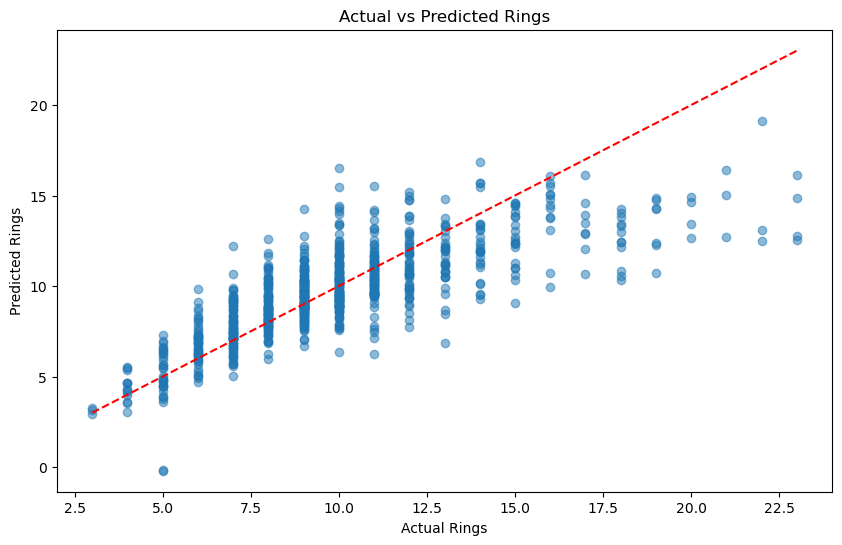

In [18]:
# 예측값 생성
y_pred = model.predict(X_test)

# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 대각선 기준선
plt.title('Actual vs Predicted Rings')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.show()
